In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

In [3]:
import os

# Define the path to the dataset directory
dataset_path = "/content/drive/MyDrive/dataset for classifier"

# Get the list of image files
image_files = []
labels = []

# Iterate over the directories
for class_name in ['1', '0']:
    class_path = os.path.join(dataset_path, class_name)
    for filename in os.listdir(class_path):
        image_path = os.path.join(class_path, filename)
        image_files.append(image_path)
        labels.append(class_name)

# Convert labels to numerical values
from tensorflow.keras.utils import to_categorical

# Convert labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoded format
labels = to_categorical(labels)



In [4]:
print(labels.shape)
print(len(image_files))
print(labels)

(1266, 2)
1266
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [5]:


X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.3, random_state=42, stratify=labels)



In [6]:
print(y_test)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
original_classes = ['1', '0']
label_encoder.fit(original_classes)
c_test=y_test
class_names = label_encoder.inverse_transform(np.argmax(c_test, axis=1))
#print(c_test)
class_names = class_names.astype(int)
print(class_names)

[0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0
 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1
 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1
 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0
 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0
 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1
 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1
 1 1 0 1 1 0 0 0 1 1]


In [8]:
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

886 886
380 380


In [9]:
def load_preprocess_image(image_path):
     image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
     image = tf.keras.preprocessing.image.img_to_array(image)
     image = image / 255.0
     return image

X_train = [str(image_path) for image_path in X_train]
X_test = [str(image_path) for image_path in X_test]

# Load and preprocess the training images and labels
X_train = [load_preprocess_image(image_path) for image_path in X_train]
X_train = np.array(X_train)
y_train= np.array(y_train)

# Load and preprocess the testing images and labels
X_test= [load_preprocess_image(image_path) for image_path in X_test]
X_test = np.array(X_test)
y_test = np.array(y_test)

In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(886, 224, 224, 3) (886, 2)
(380, 224, 224, 3) (380, 2)


In [ ]:
from tensorflow.keras.regularizers import l2

# Load the pre-trained ResNet-50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
     layer.trainable = False

 # Add your own classification layers on top
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
# Single class
#model.add(Dense(1, activation='sigmoid'))

# Two classes
model.add(Dense(2, activation='softmax'))


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/20
12/12 [==============================] - 7s 636ms/step - loss: 5.0422 - accuracy: 0.5297 - val_loss: 4.2016 - val_accuracy: 0.5169
Epoch 2/20
12/12 [==============================] - 3s 243ms/step - loss: 3.8153 - accuracy: 0.6483 - val_loss: 3.2699 - val_accuracy: 0.8427
Epoch 3/20
12/12 [==============================] - 3s 223ms/step - loss: 3.0619 - accuracy: 0.7528 - val_loss: 2.6848 - val_accuracy: 0.9831
Epoch 4/20
12/12 [==============================] - 3s 219ms/step - loss: 2.6045 - accuracy: 0.8107 - val_loss: 2.3351 - val_accuracy: 0.9888
Epoch 5/20
12/12 [==============================] - 3s 220ms/step - loss: 2.3011 - accuracy: 0.8983 - val_loss: 2.1036 - val_accuracy: 0.9831
Epoch 6/20
12/12 [==============================] - 3s 230ms/step - loss: 2.1228 - accuracy: 0.9350 - val_loss: 1.9690 - val_accuracy: 0.9888
Epoch 7/20
12/12 [==============================] - 3s 244ms/step - loss: 1.9758 - accuracy: 0.9477 - val_loss: 1.8497 - val_accuracy: 0.9888
Epoch 

In [ ]:
model.save('/content/drive/My Drive/organClassifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
model_path='/content/drive/MyDrive/organClassifier.h5'

In [12]:
from tensorflow.keras.models import load_model
model=load_model(model_path)

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print('Training Accuracy:', train_accuracy,"Train loss",train_loss)
print('Testing Accuracy:', test_accuracy,"Test Loss",test_loss)



12/12 - 3s - loss: 1.2591 - accuracy: 0.9816 - 3s/epoch - 233ms/step
Training Accuracy: 0.9954853057861328 Train loss 1.248887062072754
Testing Accuracy: 0.9815789461135864 Test Loss 1.259122610092163


In [ ]:
print(y_test)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [ ]:
first_layer = model.layers[0]
expected_input_shape = first_layer.input_shape
print('Expected input shape:', expected_input_shape)

Expected input shape: (None, 224, 224, 3)


In [13]:
import numpy as np

# Assume 'predictions' is the output from the model.predict() function
predictions = model.predict(X_test)

# Apply argmax to get the class labels
labels = np.argmax(predictions, axis=1)

print(labels)


12/12 [==============================] - 2s 92ms/step
[0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0
 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1
 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1
 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0
 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0
 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1
 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0
 1 0 0 1 1 0 0 0 1 1]


In [14]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your one-hot encoded labels and predictions
conf = confusion_matrix(class_names, labels)
print(conf)

[[195   1]
 [  6 178]]


Text(0.5, 155.72222222222217, 'Predicted')

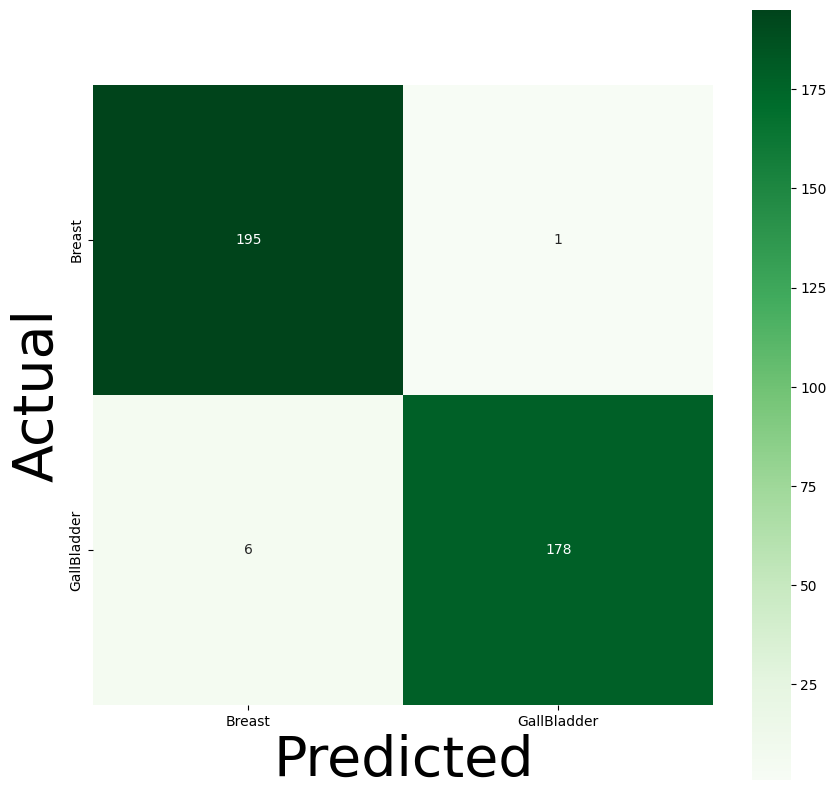

In [19]:
info = [
    'Breast'   ,  # 0
    'GallBladder'   ,  # 1
]
plt.figure(figsize = (10,10))
ax = sns.heatmap(conf, cmap=plt.cm.Greens, annot=True, square=True, fmt=".0f", xticklabels = info, yticklabels = info)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)


In [ ]:
from sklearn.metrics import f1_score

# Assume 'predictions' is the output from the model.predict() function
#predictions = model.predict(X_test)

# Apply argmax to get the class labels
#labels = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate F1 score
f1 = f1_score(y_true, labels, average='macro')
print(f1)


0.981542005814962


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming 'labels' is the output from your model
# labels = model.predict(X_test)

# Since you're using argmax on y_test, ensure y_test is in the same format as the model's prediction
y_true = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, labels)
print(cm)


AxisError: axis 1 is out of bounds for array of dimension 1